<a href="https://colab.research.google.com/github/MariaMeram/col-rainfall/blob/main/col-rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Searching the fille
df = pd.read_csv('col-rainfall-subnat-5ytd (1).csv')
df.head()

,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,2021-01-01,1,901156,CO05,2056.0,43.619164,39.508300,138.493200,156.304490,762.32390,788.99585,109.236170,88.957960,96.640790,final
1,2021-01-11,1,901156,CO05,2056.0,20.935797,33.392090,114.111870,126.439186,685.78940,706.75750,67.555050,90.621280,97.054040,final
2,2021-01-21,1,901156,CO05,2056.0,40.658073,33.087387,105.213036,105.987780,595.00490,613.83020,119.877150,99.301956,96.957920,final
3,2021-02-01,1,901156,CO05,2056.0,23.963522,35.089073,85.557396,101.568540,535.07150,538.21967,72.247925,84.975730,99.420456,final
4,2021-02-11,1,901156,CO05,2056.0,24.183365,34.378970,88.804960,102.555435,418.35266,463.06170,74.109010,87.215454,90.448044,final


In [3]:
#Convert "date" to a datatime type and set as index
df['date']= pd.to_datetime(df['date'], format = "%Y-%m-%d")
#df.set_index('date', inplace=True)


In [4]:
# Extraer año
df['year'] = df['date'].dt.year

#  Agrupar por PCODE y año, sacar promedio de rfq
df_grouped = df.groupby(['PCODE', 'year'])['rfq'].mean().reset_index()

df_grouped


,PCODE,year,rfq
0,CO05,2021,100.141264
1,CO05,2022,113.293398
2,CO05,2023,92.896182
3,CO05,2024,88.195756
4,CO05,2025,146.484715
...,...,...,...
5735,CO99773,2021,95.640476
5736,CO99773,2022,90.640798
5737,CO99773,2023,93.463565
5738,CO99773,2024,96.699439


In [21]:
top_10_rfq = df_grouped.nlargest(10, 'rfq')
display(top_10_rfq)

,PCODE,year,rfq
2994,CO27372,2025,253.819728
3039,CO27615,2025,219.580176
359,CO05480,2025,218.395294
2964,CO27150,2025,210.157481
2954,CO27099,2025,207.710909
2944,CO27075,2025,198.371972
184,CO05172,2025,191.725574
214,CO05234,2025,188.571786
164,CO05147,2025,188.003950
69,CO05045,2025,187.708758


In [5]:
df_filtered = df_grouped[df_grouped['PCODE'].str.match(r'^CO\d{2}$')]
display(df_filtered)

,PCODE,year,rfq
0,CO05,2021,100.141264
1,CO05,2022,113.293398
2,CO05,2023,92.896182
3,CO05,2024,88.195756
4,CO05,2025,146.484715
...,...,...,...
5715,CO99,2021,96.279724
5716,CO99,2022,91.118220
5717,CO99,2023,92.751245
5718,CO99,2024,97.573823


In [6]:
#df_2025 = df_filtered[df_filtered['year'] == 2025].max()
#display(df_2025)
max_pcode=[]
for ye in df_filtered['year'].unique():
    # Finding Max RFQ
    max_rfq_year = df_filtered[df_filtered['year'] == ye]['rfq'].max()
    # Filtrar por año y RFQ máximo de ese año
    df_m = df_filtered[(df_filtered['year'] == ye) & (df_filtered['rfq'] == max_rfq_year)]
    max_pcode.extend(df_m['PCODE'].tolist())
    display(df_m)

,PCODE,year,rfq
735,CO11,2021,119.934251


,PCODE,year,rfq
4866,CO73,2022,134.386251


,PCODE,year,rfq
3642,CO52,2023,125.782985


,PCODE,year,rfq
623,CO08,2024,120.263008


,PCODE,year,rfq
2174,CO23,2025,154.28824


In this analysis, I discovered which departments were most affected annually.

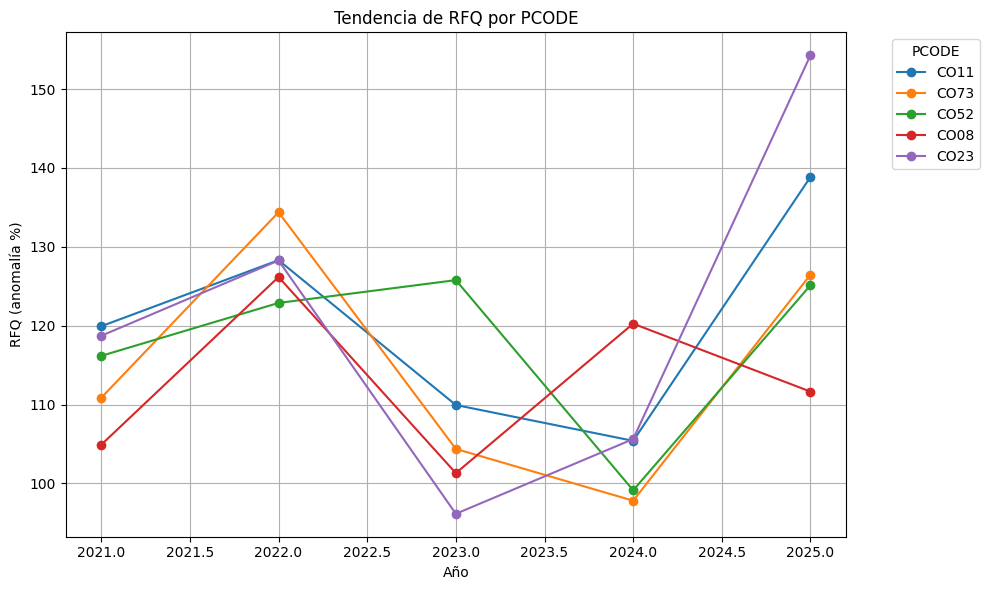

In [23]:
plt.figure(figsize=(10, 6))
for pcode in max_pcode:#df_filtered['PCODE'].unique():
    df_p = df_filtered[df_filtered['PCODE'] == pcode]
    plt.plot(df_p['year'], df_p['rfq'], marker='o', linestyle='-', label=pcode)  # Línea continua

plt.xlabel('Año')
plt.ylabel('RFQ (anomalía %)')
plt.title('Tendencia de RFQ por PCODE')
plt.legend(title='PCODE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

With the grapgh i was lookng for a tendence by the years and understand if there is period of the year that rains, but its not clear.


In [7]:
df_filtered = df_grouped[(df_grouped['PCODE'].str.match(r'^CO05')) & (df_grouped['year'] == 2025)]
display(df_filtered)

,PCODE,year,rfq
4,CO05,2025,146.484715
9,CO05001,2025,146.431674
14,CO05002,2025,142.754851
19,CO05004,2025,152.055558
24,CO05021,2025,147.533799
...,...,...,...
599,CO05885,2025,153.756847
604,CO05887,2025,123.129063
609,CO05890,2025,157.112313
614,CO05893,2025,121.669607


I am interested in knowing what the most affected municipalities are in the Antioquia department, because I live there.

In [8]:
top_10_rfq = df_filtered.nlargest(10, 'rfq')
display(top_10_rfq)

,PCODE,year,rfq
359,CO05480,2025,218.395294
184,CO05172,2025,191.725574
214,CO05234,2025,188.571786
164,CO05147,2025,188.003950
69,CO05045,2025,187.708758
354,CO05475,2025,181.506014
559,CO05837,2025,179.360114
479,CO05665,2025,175.975617
594,CO05873,2025,173.420063
74,CO05051,2025,172.527370
